# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [96]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

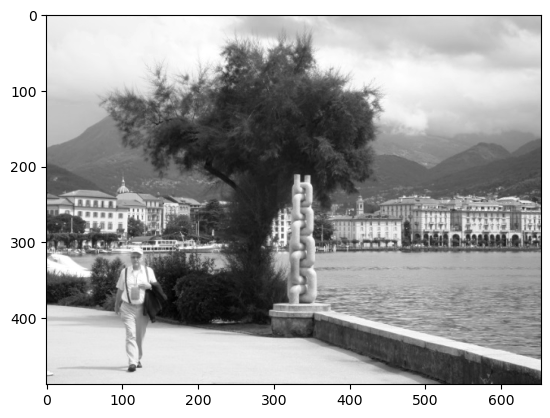

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [98]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

Text(0, 0.5, 'Значение')

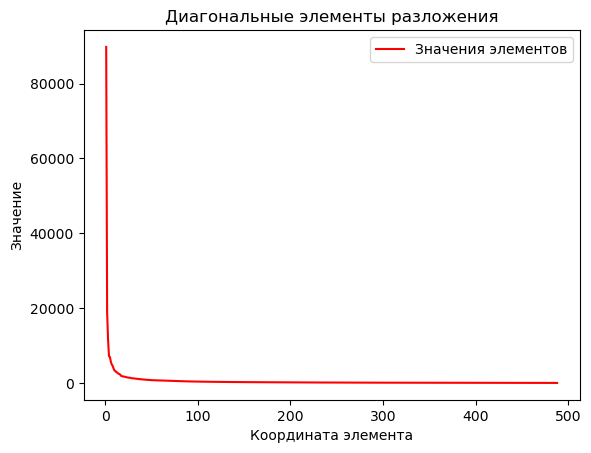

In [99]:
fig,ax = plt.subplots()
ax.set_title("Диагональные элементы разложения")
ax.plot(range(1, len(S) + 1), S, color = 'r', label = 'Значения элементов')
ax.legend()
ax.set_xlabel('Координата элемента')
ax.set_ylabel('Значение')

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

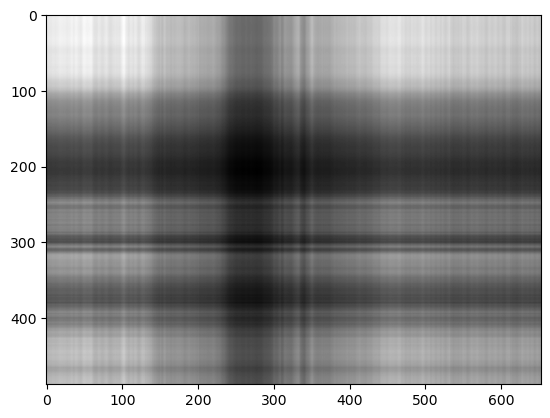

In [100]:
imgplot = plt.imshow(U[:, :1]@VT[:1,:]*S[0], cmap='gray')

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

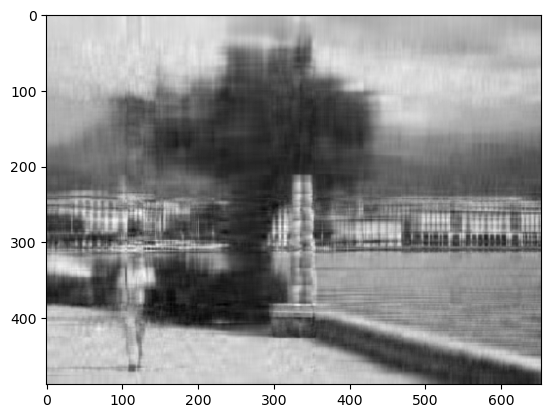

In [101]:
imgplot_1_20 = plt.imshow(np.einsum('ij,j->ij', U[:, :20], S[:20])@VT[:20,:], cmap='gray')

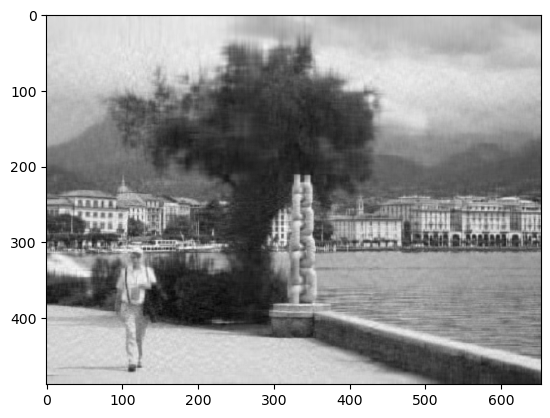

In [102]:
imgplot_1_20 = plt.imshow(np.einsum('ij,j->ij', U[:, :50], S[:50])@VT[:50,:], cmap='gray')

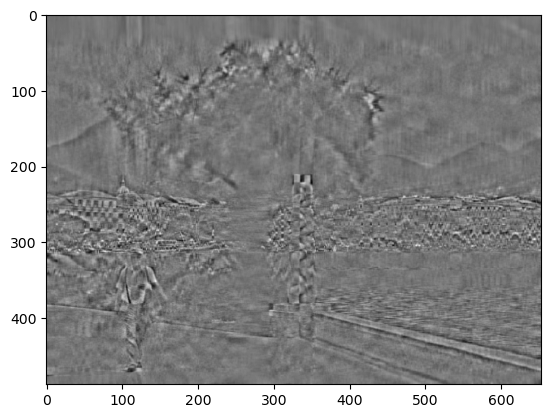

In [103]:
imgplot_1_20 = plt.imshow(np.einsum('ij,j->ij', U[:, 19:100], S[19:100])@VT[19:100,:], cmap='gray')

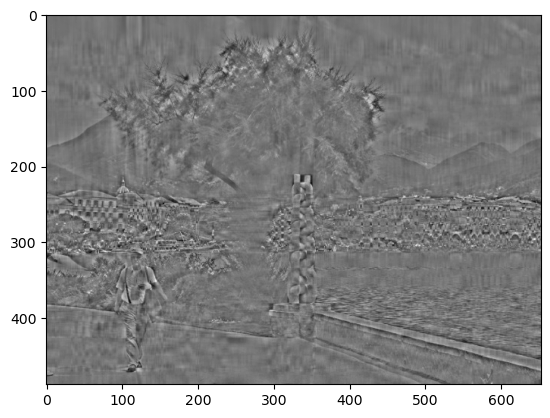

In [104]:
imgplot_1_20 = plt.imshow(np.einsum('ij,j->ij', U[:, 19:], S[19:])@VT[19:,:], cmap='gray')

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Заметим следующее:
- Начальные элементы задают основной паттерн изображение
- Последующие лишь уточняют границы


Из этого нам достаточно взять какое-то количество первых элементов для передачи изображения.
Математически это объяснимо, что именно разложение на первых элементах является решением задачи о приближении матрицы меньшего ранга к изначальной.

Теперь необходимо определить, сколько первых элементов необходимо взять.
Давайте проанализируем отношение норм Фробениуса у матриц с различным количеством взятых элеметнов по отношению к изначальной матрице.

In [105]:
original = np.linalg.norm(img)
print("Норма Фробениуса изображения:{}".format(original))
lastnorm = 0
for k in range(5, len(S), 5):
    print("Понижение по {}-му элементу:".format(k))
    norm = np.linalg.norm(np.einsum('ij,j->ij', U[:, :k], S[:k])@VT[:k,:])/original
    print("Отношение норм Фробениуса= {}".format(norm))
    print("Разница с полным соотвествием= {}".format((1 - norm)*original))
    if (k > 5):
        print("Разница с предыдущей= {}".format((norm - lastnorm)*original))
    print()
    lastnorm = norm

Норма Фробениуса изображения:94217.03411622095
Понижение по 5-му элементу:
Отношение норм Фробениуса= 0.9876281170494722
Разница с полным соотвествием= 1165.6421180317723

Понижение по 10-му элементу:
Отношение норм Фробениуса= 0.9934982729543249
Разница с полным соотвествием= 612.5734388767262
Разница с предыдущей= 553.0686791550461

Понижение по 15-му элементу:
Отношение норм Фробениуса= 0.9956426260127574
Разница с полным соотвествием= 410.5388536131663
Разница с предыдущей= 202.03458526355988

Понижение по 20-му элементу:
Отношение норм Фробениуса= 0.9966689458378317
Разница с полным соотвествием= 313.8420436399885
Разница с предыдущей= 96.69680997317778

Понижение по 25-му элементу:
Отношение норм Фробениуса= 0.9973284889870152
Разница с полным соотвествием= 251.70184425224843
Разница с предыдущей= 62.140199387740076

Понижение по 30-му элементу:
Отношение норм Фробениуса= 0.9978118104057508
Разница с полным соотвествием= 206.1647336541325
Разница с предыдущей= 45.537110598115945


Отношение норм Фробениуса= 0.9999700453383941
Разница с полным соотвествием= 2.82223937446627
Разница с предыдущей= 0.24711809599858658

Понижение по 260-му элементу:
Отношение норм Фробениуса= 0.9999724591158567
Разница с полным соотвествием= 2.5948204209155845
Разница с предыдущей= 0.22741895355068537

Понижение по 265-му элементу:
Отношение норм Фробениуса= 0.9999746762635634
Разница с полным соотвествием= 2.385927339797321
Разница с предыдущей= 0.20889308111826355

Понижение по 270-му элементу:
Отношение норм Фробениуса= 0.999976732103803
Разница с полным соотвествием= 2.192232169805341
Разница с предыдущей= 0.19369516999198028

Понижение по 275-му элементу:
Отношение норм Фробениуса= 0.9999786475433321
Разница с полным соотвествием= 2.0117651383446824
Разница с предыдущей= 0.1804670314606583

Понижение по 280-му элементу:
Отношение норм Фробениуса= 0.9999804358887492
Разница с полным соотвествием= 1.8432725371714669
Разница с предыдущей= 0.1684926011732158

Понижение по 285-му эле

Как мы видим разница стремительно убывает. И уже на пятом элемента отличается лишь на 1 сотую. Постулирую, что моему глазу разница в 1 десятитысячную уже не заметна. Следовательно первых 175 элементов более чем хватит для точного изображения.

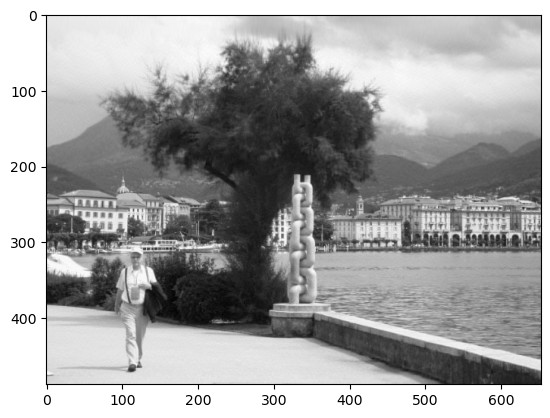

In [106]:
imgplot_1_20 = plt.imshow(np.einsum('ij,j->ij', U[:, :175], S[:175])@VT[:175,:], cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [107]:
# Пользуемся формулой из справки выше
orig_memory = len(img)*len(img[0])
r = 175
new_memory = r*(len(img)+len(img[0])+1)
print(orig_memory/new_memory)

1.5945158869151863


**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [108]:
import sys
from copy import deepcopy
comp_orig_memory = sys.getsizeof(img)
u = deepcopy(U[:, :175])
s = deepcopy(S[:175])
vt = deepcopy(VT[:175,:])
comp_new_memory = sys.getsizeof(u)+sys.getsizeof(s) + sys.getsizeof(vt)
print(comp_orig_memory)
print(comp_new_memory)
print(comp_orig_memory/comp_new_memory)

2549440
1599168
1.5942289990795213


Результат согласуется. Небольшое отличие вызвано спецификой компилятора, модуля, языка.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

1. $\max_w \frac{|Xw|}{|w|} = \max_{|w| = 1}|Xw|$:
$$|v| = 1; w = \alpha v$$
$$\max_w \frac{|Xw|}{|w|} = \max_{\alpha v} \frac{\sqrt{(X\alpha v, X\alpha v,)}}{\sqrt{(\alpha v, \alpha v)}} = \max_{\alpha v} \frac{\alpha\sqrt{(X v, X v,)}}{\alpha\sqrt{( v,  v)}}=
\max_v \frac{\sqrt{(X v, X v,)}}{\sqrt{( v,  v)}} = \max_v \sqrt{(X v, X v,)} = \max_{|v| = 1} |X v|$$
2. $\sigma_1 = \max_{|w| = 1}|Xw|$ 
Возьмем базис состоящий из собсвенных векторов оператора $X^TX$, пусть $w = x_1v_1 + \dots + x_nv_n$, причем $|x| = 1$
$$\max_{|w| = 1}|Xw| = \max_{|w| = 1} \sqrt{(Xw, Xw)} = \max_{|w| = 1}\sqrt{w^T X^T X w}$$
Рассмотрим последнее:
$$w^T X^T X w = (x_1v_1 + \dots + x_nv_n)^T X^T X (x_1v_1 + \dots + x_nv_n)$$
Вспомним, что $X^TX$ - матрица Грамма, а v - ортонормированный базис, из этого, произведение представимо в виде суммы скалярных произведений, причем, там где умножаются разные векторы будет 0.
$$w^T X^T X w = x_1^2(v_1,v_1) + \dots + x_n^2(v_n, v_n)$$
В силу того, что v - собственные векторы $X^T X$:
$$(v_i, v_i) = v_i^T X^T X v_i = (Xv_i)^T Xv_i = \sigma_i (v_i, v_i) \sigma_i = \sigma_i^2$$
Тогда:
$$w^T X^T X w = x_1^2 \sigma_1^2 + \dots + x_n^2\sigma_n^2 $$
А в силу того, что $x_1^2 + \dots + x_n^2 = 1$ и $\sigma_1$ - максимум, то:
$$\max_{|w| = 1}\sqrt{w^T X^T X w} = \sqrt{\sigma_1^2} = \sigma_1$$
3. $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$
$$X = U\Sigma V^T$$
U, V - ортогональные матрицы, следовательно их столбцы образуют ортонормированный базис. Запишем в их терминах векторы u, v.
$u = x_1u_1 + \dots + x_mu_m$ и $v = y_1v_1 + \dots + y_nv_n$. Тогда:
$$|u^T Xv| = \sqrt{(u^T X v, u^T X v)} = \sqrt{v^T X^T u u^T X v}$$
$$u^t u = x_1^2 + \dots + x_n^2 = 1$$
$$\sqrt{v^T X^T u u^T X v} = \sqrt{v^T X^T X v}$$
Сведено к пункту 2

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

$rk A = 1$ Докажем:
$$A = \left( \begin{array}{cccc}
     \sin 0 \cos 0&  \sin 0 \cos 1 &   \ldots & \sin 0 \cos n-1\\
     \sin 1 \cos 0&  \sin 1 \cos 1 &   \ldots & \sin 1 \cos n-1\\
     \vdots       &  \vdots        &   \ddots & \vdots         \\
     \sin n-1 \cos 0&  \sin n-1 \cos 1 &   \ldots & \sin n-1 \cos n-1\\
\end{array}\right) = \left( \begin{array}{cccc}
     0        &  0               &   \ldots &               0  \\
     \sin 1   &  \sin 1 \cos 1   &   \ldots & \sin 1 \cos n-1  \\
     \vdots   &  \vdots          &   \ddots & \vdots           \\
     \sin n-1 &  \sin n-1 \cos 1 &   \ldots & \sin n-1 \cos n-1\\
\end{array}\right)$$
Далее найдем ранг посредством рассмотрения этого как ОСЛУ: применим второе преобразование поделив на соотвествующий синус (заметим, что синус равен 0 только при иррациональном аргументе и 0, но все числа целые, а первую строку мы уже рассмотрели)
$$\left( \begin{array}{cccc}
     0        &  0               &   \ldots &               0  \\
     \sin 1   &  \sin 1 \cos 1   &   \ldots & \sin 1 \cos n-1  \\
     \vdots   &  \vdots          &   \ddots & \vdots           \\
     \sin n-1 &  \sin n-1 \cos 1 &   \ldots & \sin n-1 \cos n-1\\
\end{array}\right) \to \left( \begin{array}{cccc}
     0          &  0       &   \ldots &               0  \\
     1          & \cos 1   &   \ldots & \cos n-1  \\
     \vdots     & \vdots   &   \ddots & \vdots           \\
     1          & \cos 1   &   \ldots & \cos n-1\\
\end{array}\right)$$
Применим первое и третье преобразование, получим:
$$\left( \begin{array}{cccc}
     0          &  0       &   \ldots &               0  \\
     1          & \cos 1   &   \ldots & \cos n-1  \\
     \vdots     & \vdots   &   \ddots & \vdots           \\
     1          & \cos 1   &   \ldots & \cos n-1\\
\end{array}\right) \to \left( \begin{array}{cccc}
     1          & \cos 1   &   \ldots & \cos n-1  \\
          0          &  0       &   \ldots &               0  \\
     \vdots     & \vdots   &   \ddots & \vdots           \\
          0          &  0       &   \ldots &               0  \\
\end{array}\right)$$
Среди данных векторов 1 линейно независимый - ранг 1.

В силу строения матрицы можно построить очевидное диагональное разложение:
$$A = \left(\begin{array}{c}
      \sin 0 \\
      \sin 1 \\
      \vdots \\
      \sin n-1
   \end{array}\right)1\left(\begin{array}{cccc}
      \cos 0 & \cos 1 & \ldots & \cos n-1
   \end{array}\right)$$
Нам достаточно нормировать столбцы матриц и мы получим нужное разложение.
$$\left(\begin{array}{c}
      \frac{\sin 0}{\sqrt{\sin^2 0  + \dots + \sin^2 n-1}} \\
      \frac{\sin 1}{\sqrt{\sin^2 0  + \dots + \sin^2 n-1}} \\
      \vdots \\
      \frac{\sin n-1}{\sqrt{\sin^2 0 + \dots + \sin^2 n-1}}
   \end{array}\right)\left(\begin{array}{c}\sqrt{\sin^2 0 + \sin^2 1 + \dots + \sin^2 n-1}\sqrt{\cos^2 0 + \cos^2 1 + \dots + \cos^2 n-1} \end{array}\right) \left(\begin{array}{cccc}
      \frac{\cos 0}{\sqrt{\cos^2 0  + \dots + \cos^2 n-1}}
      & \frac{\cos 1}{\sqrt{\cos^2 0  + \dots + \cos^2 n-1}}
      & \ldots & \frac{\cos n-1}{\sqrt{\cos^2 0 + \dots + \cos^2 n-1}} \\
   \end{array}\right)$$

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Покажем ядро $r+1\leq i \leq n$:
$$ A v_i = U\Sigma V^T v_i = U\Sigma \left(\begin{array}{c}
      (v_1, v_i) = 0 \\
      (v_2, v_i) = 0 \\
      \vdots \\
      (v_i, v_i) = 1\\
      \vdots \\
      (v_n, v_i) = 0
   \end{array}\right)  = U0 = 0$$
Следовательно эти векторы образуют базис ядра.
Покажем, что $u_1, \dots, u_r$ образую базис образа.
Дополним базис $v_{r+1}, \dots, v_{n}$ до $\frac{v_1}{\sigma_1}, \dots, \frac{v_r}{\sigma r}, v_{r+1}, \dots, v_{n}$.
Они линейно независимы по свойствам собственных векторов, а кроме того, по свойствам дополненного базиса ядра, отображения новых векторов образуют базис образа. Найдем базис образа $0\leq i \leq r$:
$$A \frac{v_i}{\sigma_i} = U\Sigma V^T \frac{v_i}{\sigma_i} = U\Sigma \left(\begin{array}{c}
      (v_1, \frac{v_i}{\sigma_i}) = 0 \\
      (v_2, \frac{v_i}{\sigma_i}) = 0 \\
      \vdots \\
      (v_i, \frac{v_i}{\sigma_i}) = \frac{1}{\sigma_i}\\
      \vdots \\
      (v_n, \frac{v_i}{\sigma_i}) = 0
   \end{array}\right)  = U\left(\begin{array}{c}
       0 \\
       0 \\
      \vdots \\
       1 \\
      \vdots \\
       0
   \end{array}\right) = u_i$$
Следовательно они образуют базис образа.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Пусть $A = U\Sigma V^T$ тогда: 
$$P = U\Sigma V^T(V \Sigma^T U^T U\Sigma V^T)^{-1}V \Sigma^T U^T = U\Sigma V^T(V \Sigma^T\Sigma V^T)^{-1}V \Sigma^T U^T = U\Sigma V^T (V diag(\sigma_1^2, \dots, \sigma_n^2) V^T)^{-1}V \Sigma^T U^T = U\Sigma V^T (V^T)^{-1} diag(\sigma_1^{-2}, \dots, \sigma_n^{-2}) V^{-1}V \Sigma^T U^T = U\Sigma diag(\sigma_1^{-2}, \dots, \sigma_n^{-2})\Sigma^T U^T = U\Sigma_E U^T$$
$\Sigma_E = \left(\begin{matrix}
1 & 0 & \ldots  &  \stackrel{n}{0}  & & 0\\
0 & 1 & \ldots  &  0  & & 0 \\
\vdots& \vdots & \ddots & \vdots  & \vdots &\vdots \\
0 & 0 & \ldots  & 1 & \ldots & 0 \\
0 & 0 & \vdots  & \vdots & \ddots &  \vdots\\
0 & 0 & \ldots  & 0 & \ldots & 0\\
\end{matrix}\right) \in MAT(R)_{mm}$ Это и есть искомая матрица.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


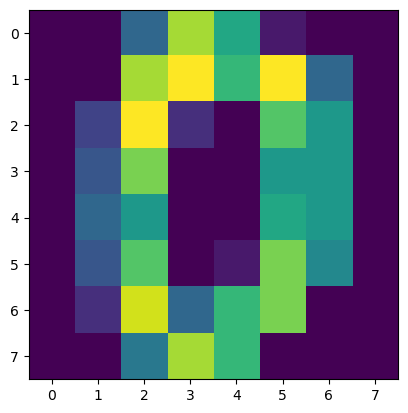

In [109]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [110]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

Text(0, 0.5, 'Второй признак')

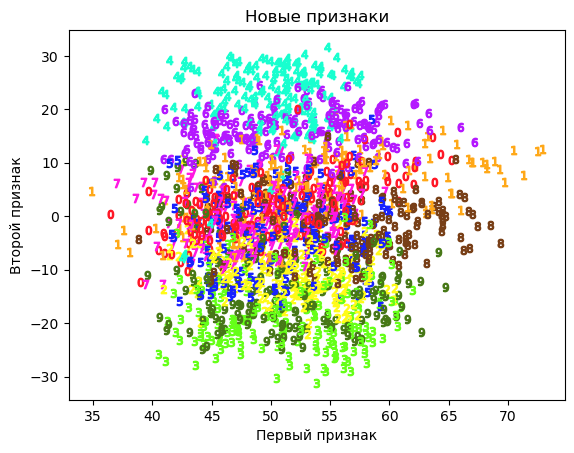

In [111]:
X_new = U@np.diag(S)
fig, ax = plt.subplots()
ax.set_title("Новые признаки")
colour = ["#ff1827",
          "#ffa818",
          "#fffb18",
          "#65ff18",
          "#18ffcf",
          "#1822ff",
          "#b418ff",
          "#ff18e2",
          "#783f17",
          "#477817"]
for i in range(len(X_new)):
    ax.scatter(X_new[i][0], X_new[i][1], c = colour[digits.target[i]], marker="${}$".format(digits.target[i]))
ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

0:00:00.063399


Text(0, 0.5, 'Второй признак')

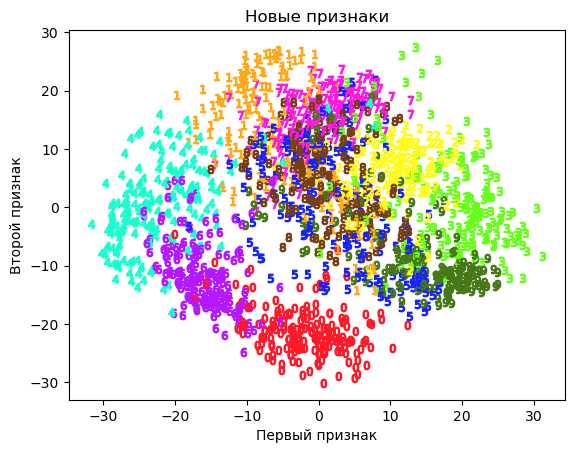

In [112]:
from datetime import datetime
import time
start_time = datetime.now()
X = digits.data
for i in range(len(X[0])):
    m = sum(X[:,i])/len(X)
    for j in range(len(X)):
        X[j][i]-=m
U, S, VT = svd(X, full_matrices=False)
X_new = U@np.diag(S)
print(datetime.now() - start_time)
fig, ax = plt.subplots()
ax.set_title("Новые признаки")

for i in range(len(X_new)):
    ax.scatter(X_new[i][0], X_new[i][1], c = colour[digits.target[i]], marker="${}$".format(digits.target[i]))
ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Последняя отличается более плотным расположением точек, относящихся к одним цифрам и в то же время эти облака плотности располагаются дальше друг от друга. Как следствие легче разлечить места концетрации тех или иных точек.
Благодаря этому последнее разложение удобнее использовать для анализа изображения.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

Сравним результаты на нескольких дата сетах:
- MNIST
- Wine recognition dataset
- Iris plants datase
    Эти датасеты дадут неплохие результаты для сравнения. Так как позволят посмотреть и на то, как методы справляются с различением изображений (сет 1) и классификацией из числовых параметров (сеты 2 и 3).
    
    Строить будем по двум новым признакам.

0:00:00.001337


Text(0, 0.5, 'Второй признак')

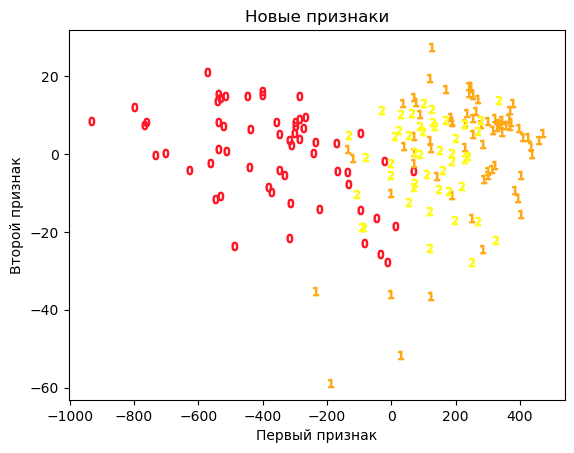

In [113]:
# SVD set2
wines = datasets.load_wine()
X = wines.data
start_time = datetime.now()

for i in range(len(X[0])):
    m = sum(X[:,i])/len(X)
    for j in range(len(X)):
        X[j][i]-=m
U, S, VT = svd(X, full_matrices=False)
X_new = U@np.diag(S)
print(datetime.now() - start_time)
fig, ax = plt.subplots()
ax.set_title("Новые признаки")

for i in range(len(X_new)):
    ax.scatter(X_new[i][0], X_new[i][1], c = colour[wines.target[i]], marker="${}$".format(wines.target[i]))
ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

0:00:00.000756


Text(0, 0.5, 'Второй признак')

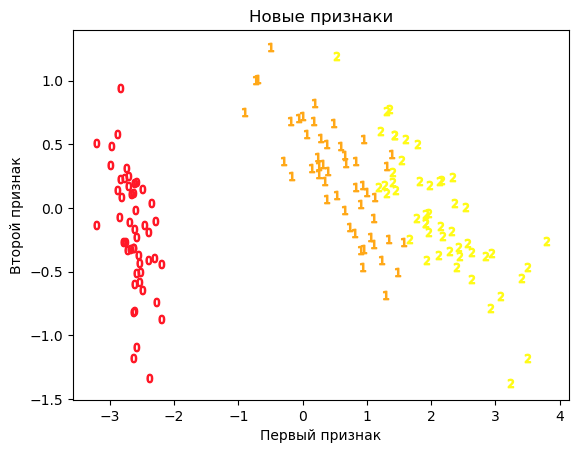

In [114]:
# SVD set3
ires = datasets.load_iris()
X = ires.data
start_time = datetime.now()

for i in range(len(X[0])):
    m = sum(X[:,i])/len(X)
    for j in range(len(X)):
        X[j][i]-=m
U, S, VT = svd(X, full_matrices=False)
X_new = U@np.diag(S)
print(datetime.now() - start_time)
fig, ax = plt.subplots()
ax.set_title("Новые признаки")

for i in range(len(X_new)):
    ax.scatter(X_new[i][0], X_new[i][1], c = colour[ires.target[i]], marker="${}$".format(ires.target[i]))
ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

0:00:00.001206


Text(0, 0.5, 'Второй признак')

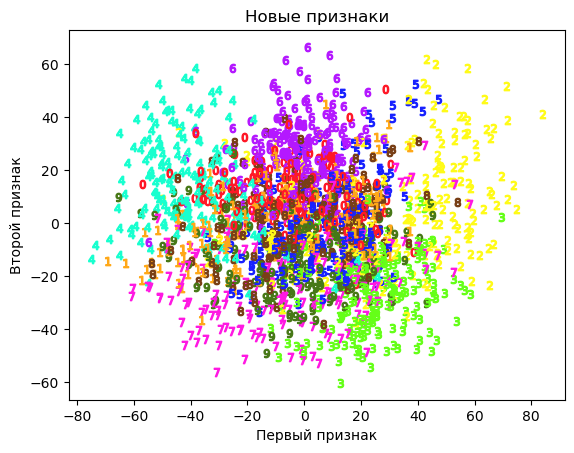

In [115]:
# Gauss set1
from sklearn.random_projection import GaussianRandomProjection
rng = np.random.RandomState(42)
transformer = GaussianRandomProjection(n_components = 2, random_state=rng)
X = digits.data
start_time = datetime.now()

X_new = transformer.fit_transform(X)
print(datetime.now() - start_time)
fig, ax = plt.subplots()
ax.set_title("Новые признаки")

for i in range(len(X_new)):
    ax.scatter(X_new[i][0], X_new[i][1], c = colour[digits.target[i]], marker="${}$".format(digits.target[i]))
ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

0:00:00.000370


Text(0, 0.5, 'Второй признак')

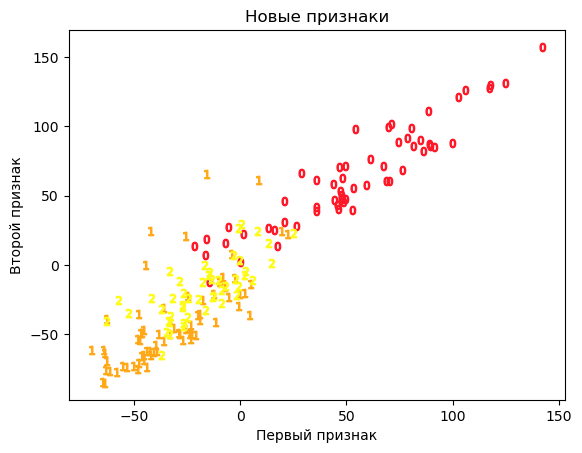

In [116]:
# Gauss set2
X = wines.data
start_time = datetime.now()

X_new = transformer.fit_transform(X)
print(datetime.now() - start_time)
fig, ax = plt.subplots()
ax.set_title("Новые признаки")

for i in range(len(X_new)):
    ax.scatter(X_new[i][0], X_new[i][1], c = colour[wines.target[i]], marker="${}$".format(wines.target[i]))
ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

0:00:00.000343


Text(0, 0.5, 'Второй признак')

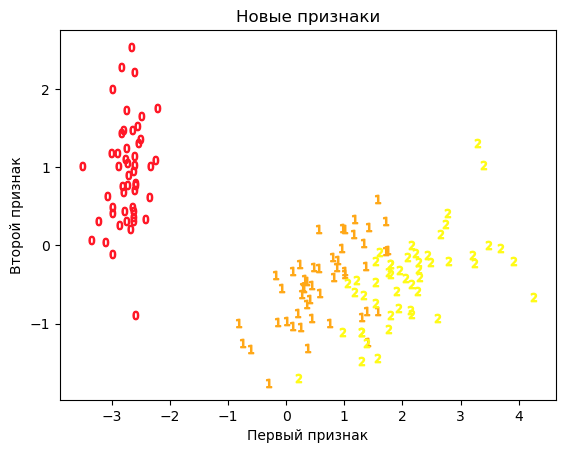

In [118]:
# Gauss set3
X = ires.data
start_time = datetime.now()

X_new = transformer.fit_transform(X)
print(datetime.now() - start_time)
fig, ax = plt.subplots()
ax.set_title("Новые признаки")

for i in range(len(X_new)):
    ax.scatter(X_new[i][0], X_new[i][1], c = colour[ires.target[i]], marker="${}$".format(ires.target[i]))
ax.set_xlabel('Первый признак')
ax.set_ylabel('Второй признак')

Из проведенных экспериментов можно предположить, что Гаусс лучше справляется с понижением ранга при дата сетах с небольшим количеством параметров (2 и 3) (точки расположены плотнее, и явнее видны границы между облаками точек), на сете 1 SVD справляется лучше. Кроме того, Гаусс в среднем работает значительно быстрее, чем SVD. 

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/tmp/ipykernel_5220/2042633187.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
/tmp/ipykernel_5220/2042633187.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
/tmp/ipykernel_5220/2042633187.py:14: UserWarning: 

`distplot

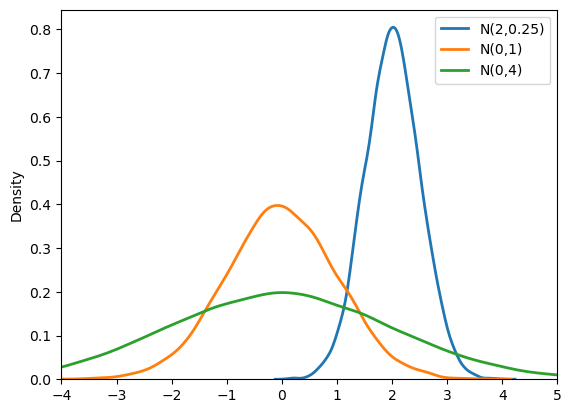

In [2]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

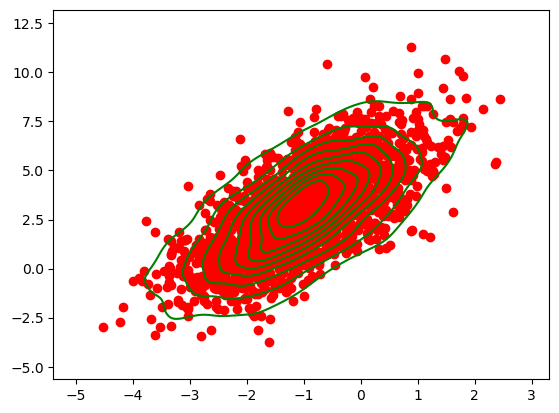

In [71]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

<Axes: >

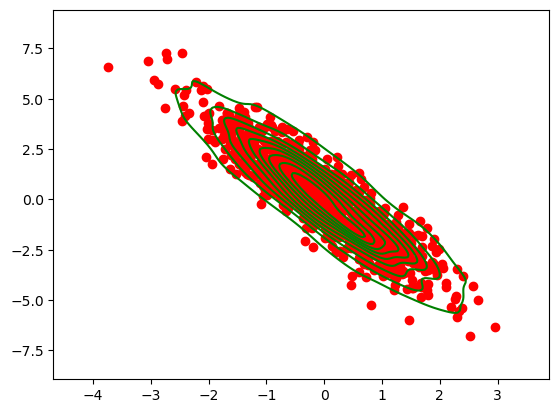

In [72]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='g')

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

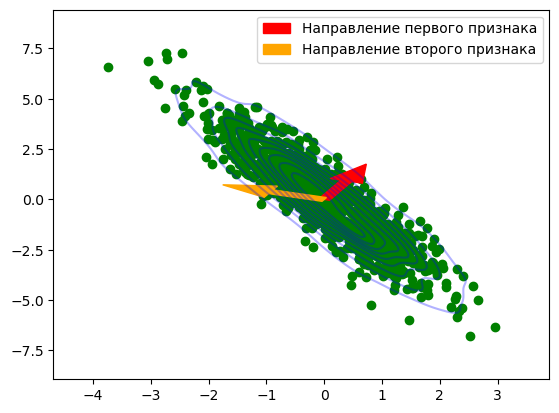

In [73]:
U, S, VT = svd(s, full_matrices=False)
plt.scatter(s[:,0], s[:,1], color='green')
X_new = U@np.diag(S)
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='b',alpha = 0.3)   
plt.arrow(0, 0, VT.T[0,0], VT.T[0,1], width = 0.2, color='red', label = "Направление первого признака")
plt.arrow(0, 0, VT.T[1,0], VT.T[1,1], width = 0.2, color='orange', label = "Направление второго признака")
plt.legend()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$
Запишем характерестический многочлен:

$$\left|\begin{matrix}
1 - t & -2\\
-2 & 5 - t
\end{matrix}\right|= t^2-6*t+1$$
$$\lambda_1 = 3 + 2 \sqrt{2}; \lambda_2 = 3 - 2 \sqrt{2}$$
Найдем соотвествующие им собственные векторы:
$$ \phi(e_1) = \Sigma e_1 = 3 + 2 \sqrt{2}e_1$$
ОСЛУ:
$$\left(\begin{array}{cc|c}
-2*\sqrt{2}-2 & -2 & 0 \\
-2 & -2*\sqrt{2}+2 & 0
\end{array}\right) \to \left(\begin{array}{cc|c}
-2*\sqrt{2}-2 & -2 & 0 \\
0 & 0 & 0
\end{array}\right) \to e_1 = \left(\begin{matrix}
-\sqrt{2}+1 \\
1
\end{matrix}\right)$$
$$ \phi(e_2) = \Sigma e_2 = 3 - 2 \sqrt{2}e_1$$
ОСЛУ:
$$\left(\begin{array}{cc|c}
2*\sqrt{2}-2 & -2 & 0 \\
-2 & 2*\sqrt{2}+2 & 0
\end{array}\right) \to \left(\begin{array}{cc|c}
2*\sqrt{2}-2 & -2 & 0 \\
0 & 0 & 0
\end{array}\right) \to e_2 = \left(\begin{matrix}
\sqrt{2}+1 \\
1
\end{matrix}\right)$$
В силу линейной независимости и ортогональности собственных векторов самосопряженного линейного оператора остается только ортонормировать этот базис, но я этого делать не буду, так как это не необходимо, чтобы определить направления осей, а ортонормированная форма этих базисов выглядит так себе.

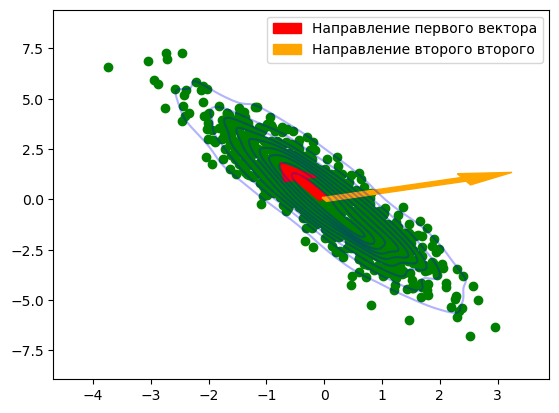

In [74]:
plt.scatter(s[:,0], s[:,1], color='green')
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='b',alpha = 0.3)   
plt.arrow(0, 0, -pow(2, 1/2) + 1, 1,width = 0.2,  color='red', label = "Направление первого вектора")
plt.arrow(0, 0, pow(2,1/2) + 1,  1, width = 0.2, color='orange', label = "Направление второго второго")
plt.legend()

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

<Axes: >

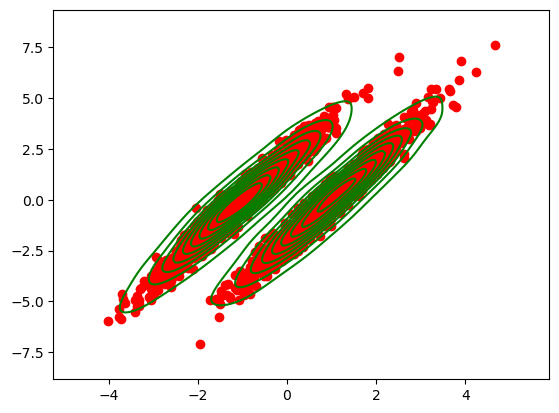

In [75]:
N = 1000
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,2],[2,4.2]]), size=N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[1,2],[2,4.2]]), size=N)
s = np.concatenate((s1,s2))
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='g')

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

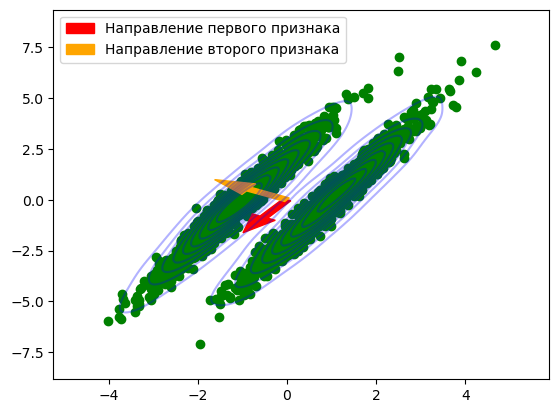

In [76]:
U, S, VT = svd(s, full_matrices=False)
plt.scatter(s[:,0], s[:,1], color='green')
X_new = U@np.diag(S)
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='b', alpha = 0.3)   
plt.arrow(0, 0, VT.T[0,0], VT.T[0,1],width = 0.2,  color='red', label = "Направление первого признака")
plt.arrow(0, 0, VT.T[1,0], VT.T[1,1],width = 0.2,  color='orange', label = "Направление второго признака")
plt.legend()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Да, второй признак, он направлен перпедикулярно касательной к обоим эллипсам. Благодаря этому легко разделить на два класса по приниципу больше или меньше 0 второй признак.

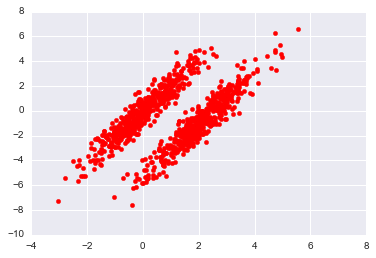

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

<Axes: >

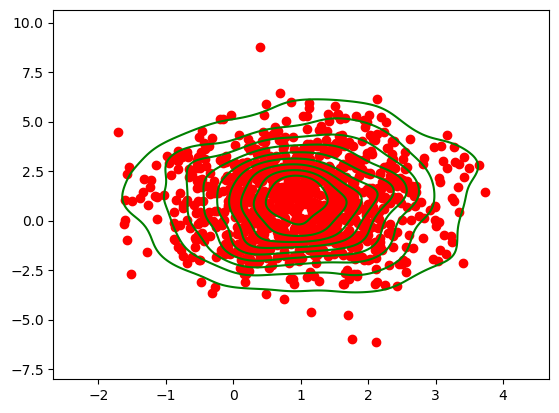

In [88]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='g')

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

В задании 3 мы приводили матрицу к главным осям, получая диагональный вид и ортонормированный базис, векторы которого направлены вдоль полуосей. Тут же матрица уже приведена к главным осям - в ортонормированном стандартном базисе имеет канонический вид, из этого можно сделать вывод, что эти направления будут примерно параллельны осям координат.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

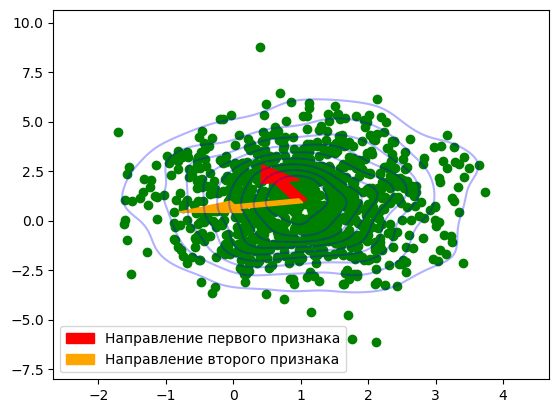

In [89]:
U, S, VT = svd(s, full_matrices=False)
plt.scatter(s[:,0], s[:,1], color='green')
X_new = U@np.diag(S)
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='b', alpha = 0.3)   
plt.arrow(1, 1, VT.T[0,0], VT.T[0,1],width = 0.2,  color='red', label = "Направление первого признака")
plt.arrow(1, 1, VT.T[1,0], VT.T[1,1],width = 0.2,  color='orange', label = "Направление второго признака")
plt.legend()

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

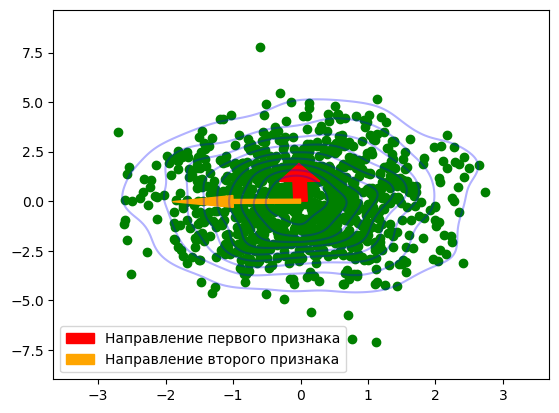

In [90]:
X = s
for i in range(len(X[0])):
    m = sum(X[:,i])/len(X)
    for j in range(len(X)):
        X[j][i]-=m
U, S, VT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='green')
X_new = U@np.diag(S)
sns.kdeplot(x = s[:,0],y=s[:,1], fill=False, color='b', alpha = 0.3)   
plt.arrow(0, 0, VT.T[0,0], VT.T[0,1],width = 0.2,  color='red', label = "Направление первого признака")
plt.arrow(0, 0, VT.T[1,0], VT.T[1,1],width = 0.2,  color='orange', label = "Направление второго признака")
plt.legend()

Проблема заключается в том, что векторы признаков направлены не вдоль предполагаемых "интересных" направлений, а отличаются от них небольшим поворотом. Проблема решается нормировкой точек - вычитанием средних значений из признаков перед SVD.